In [1]:
# Step 1: Install required packages
!pip install numpy matplotlib scikit-learn scipy
!pip install numpy

In [2]:
# Step 2: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy.io import wavfile
import os

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy.io import wavfile
from scipy.io import wavfile
from sklearn.decomposition import FastICA
from scipy.io import wavfile
from scipy.io import wavfile

In [11]:
# Step 3: Load mixed audio files
# Ensure 'mix1.wav' and 'mix2.wav' are in the same folder as this notebook
rate1, mix1 = wavfile.read('mix1.wav')
rate2, mix2 = wavfile.read('mix2.wav')

assert rate1 == rate2, "Sample rates do not match!"
min_len = min(len(mix1), len(mix2))
mix1 = mix1[:min_len]
mix2 = mix2[:min_len]

# Combine into matrix
X = np.c_[mix1, mix2]

<ipython-input-11-5e4e4dcbff93>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate1, mix1 = wavfile.read('mix1.wav')
<ipython-input-11-5e4e4dcbff93>:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate2, mix2 = wavfile.read('mix2.wav')


In [12]:
# Step 4: Apply ICA to separate signals
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X)  # Recovered signals
A_ = ica.mixing_           # Estimated mixing matrix

In [13]:
# Step 5: Normalize and save recovered signals
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return np.int16(audio * 32767)

S1 = normalize_audio(S_[:, 0])
S2 = normalize_audio(S_[:, 1])

wavfile.write("source1.wav", rate1, S1)
wavfile.write("source2.wav", rate1, S2)

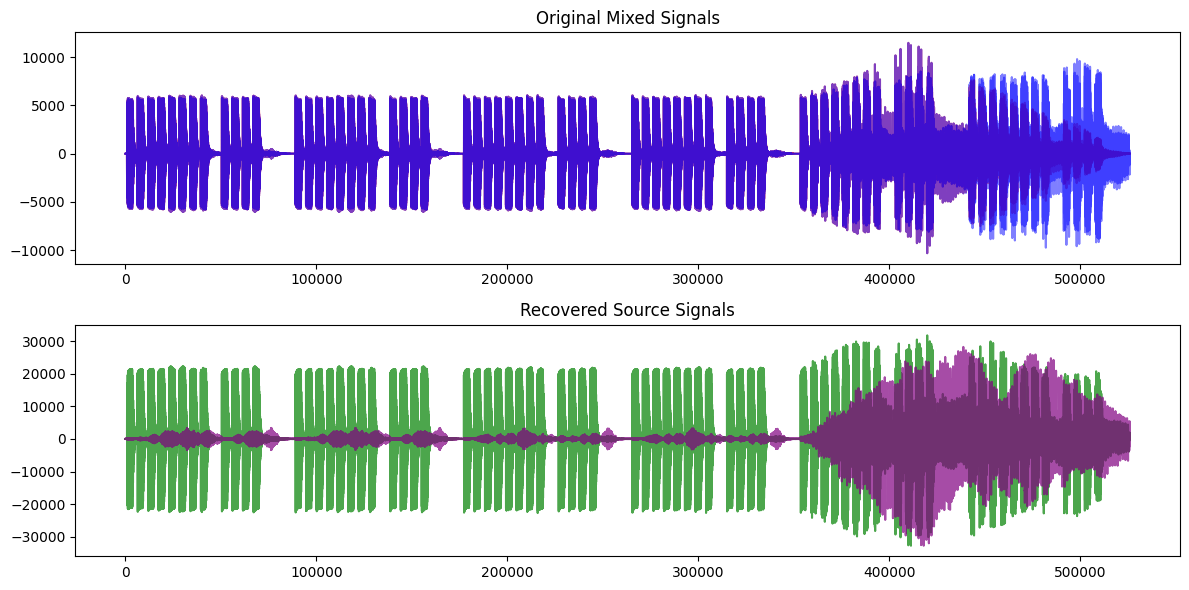

In [14]:
# Step 6: Visualize signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title("Original Mixed Signals")
plt.plot(mix1, color='r', alpha=0.5)
plt.plot(mix2, color='b', alpha=0.5)

plt.subplot(2, 1, 2)
plt.title("Recovered Source Signals")
plt.plot(S1, color='g', alpha=0.7)
plt.plot(S2, color='purple', alpha=0.7)
plt.tight_layout()
plt.show()